Best Resoures for Learning Python:

***Think Stats 2e & Think Python 2e, Allen B. Downey*** (free)
- http://greenteapress.com/wp/think-stats-2e/

- https://greenteapress.com/wp/think-python-2e/

***Python For Everyone, Charles Severance*** (free)
- https://www.py4e.com/html3/

***UC Berkeley Data Science course materials*** (free)
- http://www.data8.org

**Grok learning** (Python Beginner and Intermediate courses $30, great for students) 

- https://groklearning.com/


***UCSD Extension Courses: Python for Informatics, Python Programming Fundamentals, Advanced Python Programming courses*** ($695 each but really good)

- https://extension.ucsd.edu/courses-and-programs/python-for-informatics
and 
- https://extension.ucsd.edu/courses-and-programs/python-programming-fundamentals

***Doing Math With Python*** ($25 - a bit on the easy side maybe?)
- https://nostarch.com/doingmathwithpython

***Impractical Python Projects*** (Great! $25)

- https://nostarch.com/impracticalpythonprojects

**Automate the Boring Stuff with Python** ($25)
- https://automatetheboringstuff.com/

**My course materials:**
- https://github.com/laurenshareshian/Python_Course_Lessons (for students)

- https://github.com/laurenshareshian/Python_For_Math_Teachers (for teachers)



### Day 5 Notes - Scraping the Web

Run the cell below to import the packages:

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1. pd.read_html

One thing you may have noticed from the rollercoaster problem set is that I read data in from the website:

https://coasterbuzz.com/RollerCoasters/Top100

No more entering data by hand!

In [45]:
rankings = pd.read_html('https://coasterbuzz.com/RollerCoasters/Top100')[0]
rankings.head()

,Rank,LastWeek,Roller coaster,Score,# ofRiders
0,1,1,"Steel Vengeance, Cedar Point",4.95074,203
1,2,2,"Fury 325, Carowinds",4.85938,192
2,3,3,"El Toro, Six Flags Great Adventure",4.83784,370
3,4,4,"Lightning Rod, Dollywood",4.80208,96
4,5,5,"Twisted Colossus, Six Flags Magic Mountain",4.78378,111


This eventually allowed me to compare my rollercoaster rankings to the website's rollercoaster rankings:
<img src="images/rollercoaster.png" style="width: 500px;"/>

As another example, I created a fantasy football dataset by merging ESPN projections located here:

https://www.espn.com/fantasy/football/story/_/page/17RanksPreseason200PPR/2017-fantasy-football-ppr-rankings-top-200

with how players actually performed.

In [46]:
df = pd.read_html('http://www.espn.com/fantasy/football/story/_/page/17RanksPreseason200PPR/2017-fantasy-football-ppr-rankings-top-200')[1]
df.head()


,Player/Position/Team,PosRank,Bye,MB,MC,TC,EK,FY,AVG
0,"1. David Johnson, RB, ARI",RB1,8,1,1,3,1,2,1.6
1,"2. Le'Veon Bell, RB, PIT",RB2,9,2,2,2,2,1,1.8
2,"3. Antonio Brown, WR, PIT",WR1,9,3,4,1,4,3,3.0
3,"4. Ezekiel Elliott, RB, DAL",RB3,6,8,3,5,3,4,4.6
4,"5. Odell Beckham Jr., WR, NYG",WR2,8,5,6,7,5,5,5.6


The cool thing about this is that using multiple linear regression, we can see how position really affects points scored.

<img src="images/football.png" style="width: 500px;"/>

Word of warning - notice that in the first example I had [0] at the end of my pd.read_html statement and in the football example I had [1]. You'll have to play around with the index of the list of the table of data that comes in to select the data you are interested in.

### 2. Beautiful Soup

Beautiful Soup is another package that allows me to scrape the web. The code below pulls relevant info off of our school's faculty directory and puts it into a pandas dataframe:

In [47]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

r = requests.get('https://www.oes.edu/academics/upper-school/faculty-staff')

soup = BeautifulSoup(r.text, "html.parser")

names = []
headers = soup('h3')
for header in headers:
    names.append(header.contents[0].strip())
    
titles = []
divs = soup("div", { "class" : "fsTitles" })
for div in divs:
    titles.append(div.contents[2].strip())
    
departments = []
divs = soup("div", { "class" : "fsDepartments" })
for div in divs:
    departments.append(div.contents[2].strip())
    
phones= []
divs = soup("div", { "class" : "fsPhones" })
for div in divs:
    phones.append(div.find("a").text.strip())

df = pd.DataFrame({'titles': titles, 
                   'depts': departments, 'phones':phones}, index = names)
df.head()

,titles,depts,phones
Asha Appel,Head of Upper School,"Upper School Administration, Administration",503-768-3121
Autumn Apperson,Upper School History Teacher,History,503-416-9303
Susan Bankowski,Head Girls' Varsity Lacrosse Coach,"Athletics, Lacrosse",503-703-5705
Brad Baugher,Director of Upper School Educational Technology,Educational Technology,503-768-3136
Carmen Boyle,Upper School Spanish Teacher,World Languages,503-416-9238


### 3. APIs
Another way to get data from the web is to use an API. There are many free APIs (the NY times, weather APIs, stock APIs, Google Maps APIs, etc.) There is even a cat API! 

To use an API, you often need to give it a few parameters, such as an API key (unique to you) and a query term (for example, Bengal cat).


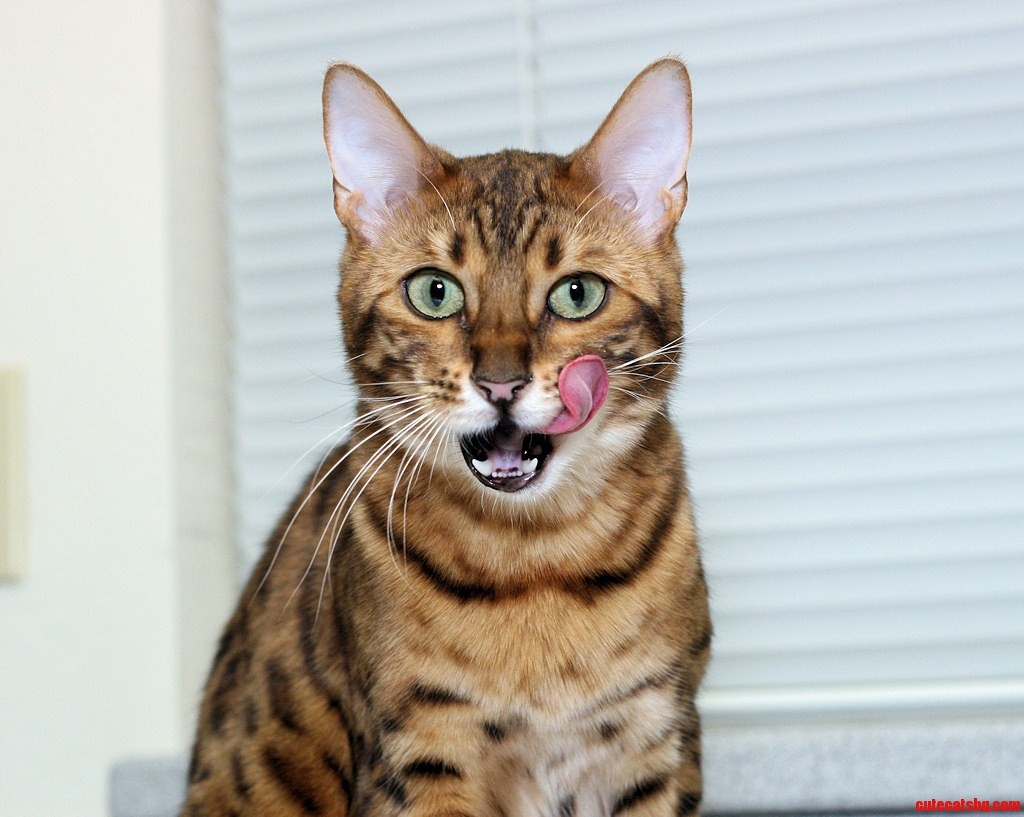

In [48]:
from IPython.display import Image
from IPython.core.display import HTML 
import requests
import json

key = 'd0e863a2-1f9a-45b8-9c20-7700ff43925c'
url = 'https://api.thecatapi.com/v1/images/search'

params = {"api-key": key, "breed_id": "beng"}
data = requests.get(url, params=params)

js = json.loads(data.content)
response = requests.get(js[0]['url'])

with open('cat.jpg', 'wb') as f:
        f.write(response.content)

Image('cat.jpg', width=500)

There's probably not too much math you can do with the cat API, but there's plenty of analysis you can do with the Twitter API.

### Twitter API

Tweepy is a package that will help us use the Twitter API easily. It's actually the first package we've used that doesn't come pre-installed in Anaconda, so you need to install it. 

You will also need a Twitter account and four special Twitter passwords. 

A.First, create a Twitter account AND make sure you have verified your phone number with Twitter (ugh).

B.Then, go to https://apps.twitter.com/ and create new app.

C.The name and description don't matter, they just need to be a certain length. You can list your school's website as the url (starting with http://).  You can leave the callback url blank. When it asks you to describe your purpose and how you'll analyze the data, you can copy and paste the following:

"I am a high school student at Oregon Episcopal School. The name of the class that I am in is Computer & Data Science. I'm learning about how to talk to APIs and would like to use the Twitter API to analyze Donald Trump's Tweets for an assignment. We will look at what times of day he tweets most often and what his most often used words are.

We'll use the Twitter AP for a final project to analyze Donald Trump's Tweets for an assignment. We will look at what times of day he tweets most often and what his most often used words are.  I will use the package Tweepy to obtain Donald Trump's recent tweets. Then we'll use the Python package matplotlib to make histograms of what times of day and what days of week he tweets most. I'll also break up his tweets into words to make a word cloud of his most used words. This analysis will only be discussed in class as a lesson on using APIs, it won't be posted anywhere."

D.Now go to Keys and Access Tokens and scroll down to Create My Access Token:

<img src="Twitter/twitter1.png" style="width: 300px;"/>
<img src="Twitter/twitter2.png" style="width: 300px;"/>

E.You should now have a Consumer Key (API Key), a Consumer Secret (API Secret), an Access Token, and an Access Token Secret. Create a hidden.py file in this same directory that contains your secret info in the following form:

```python
def oauth() :
    return {"consumer_key": "insert here",
        "consumer_secret" : "insert here",
        "access_token" : "insert here",
        "access_token_secret" : "insert here"  }
        ```
        
Save it and then run this line to import your secret info:


If everything goes according to plan, I'll now be able to import tweepy and import my hidden secret Twitter API keys:

In [49]:
import tweepy

import hidden
secret = hidden.oauth()
consumer_key = secret["consumer_key"]
consumer_secret = secret["consumer_secret"]
access_token = secret["access_token"]
access_token_secret = secret["access_token_secret"]

We'll now be able to read in approximately 3200 of Donald Trump's most recent tweets:

In [50]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)
user = 'realDonaldTrump'

text=[]
created_at=[]
retweets=[]

for i, status in enumerate(tweepy.Cursor(api.user_timeline, id=user, count = 100).items()):
    print(i, status.text)
    text.append(status.text)
    created_at.append(status.created_at)
    retweets.append(status.retweet_count)

0 Bipartisan Humanitarian Aid Bill for the Southern Border just passed. A great job done by all! Now we must work to… https://t.co/6tiMCR5ZsZ
1 .....United States Supreme Court is given additional information from which it can make a final and decisive decisi… https://t.co/lr9ZVghGl9
2 Seems totally ridiculous that our government, and indeed Country, cannot ask a basic question of Citizenship in a v… https://t.co/wxMiGvZujI
3 Thank you! #G20Summit https://t.co/28Y5rPE3BE
4 Thank you @MSNBC, real professionals! @chucktodd @maddow https://t.co/7ZCkcUQ4yA
5 I look forward to speaking with Prime Minister Modi about the fact that India, for years having put very high Tarif… https://t.co/w28hIF3jbi
6 https://t.co/JDS4zVfyBe
7 Just stopped in Alaska and said hello to our GREAT troops! https://t.co/oLYn1mpaVm
8 .@NBCNews and @MSNBC should be ashamed of themselves for having such a horrible technical breakdown in the middle o… https://t.co/UyNFxDfaat
9 BORING!
10 These flyers depict Australia’s

135 The Fake News doesn’t report it, but Republican enthusiasm is at an all time   high. Look what is going on in Orlan… https://t.co/kUvKcJK7ps
136 European Markets rose on comments (unfair to U.S.) made today by Mario D!
137 Mario Draghi just announced more stimulus could come, which immediately dropped the Euro against the Dollar, making… https://t.co/DcwHcOuAhi
138 Only a few people showed up for the so-called Impeachment rallies over the weekend. The numbers were anemic, no spi… https://t.co/mZZgn25Mpv
139 Wow!  The State Department said it has identified 30 Security Incidents involving current or former employees and t… https://t.co/ZL3RPpKmDj
140 The story in the @nytimes about the U.S. escalating attacks on Russia’s power grid is Fake News, and the Failing Ne… https://t.co/95pzIQFiFk
141 Thousands of people are already lined up in Orlando, some two days before tomorrow nights big Rally. Large Screens… https://t.co/sXWEw2DQ4v
142 ....long before they get to our Southern Border. 

260 “Someone should call Obama up. The Obama Administration spied on a rival presidential campaign using Federal Agenci… https://t.co/msMEtcaMIr
261 Beautiful afternoon in Iowa. Thank you to all of our Nation’s Farmers. May God bless you, and may God Bless America! https://t.co/VYA2bSzMWf
262 “Trump administration gives final approval for year-round E15 use” https://t.co/WPrDiyfpIW
263 Today, here in Iowa, we honor America’s cherished farming heritage. We salute your commitment to American Energy In… https://t.co/4lM6n04fcy
264 On my way to Iowa - just heard nearly 1,000 agriculture groups signed a letter urging Congress to approve the USMCA… https://t.co/dQdPN7bIQE
265 “Why did the Democrats run if they didn’t want to do things?” @SenRickScott
266 Good day in the Stock Market. People have no idea the tremendous potential our Country has for GROWTH - and many other things!
267 ....If Mexico produces (which I think they will). Biggest part of deal with Mexico has not yet been revealed! 

391 RT @RoyalFamily: The Queen, President Trump and the First Lady view a display of items from the Royal Collection illustrating the enduring…
392 RT @RoyalFamily: The President and The Prince of Wales inspect a Guard of Honour formed by Nijmegen Company, Grenadier Guards. #USStateVisi…
393 RT @RoyalFamily: The President and Mrs Trump stand with The Queen, The Prince of Wales and The Duchess of Cornwall as the US and UK nationa…
394 I believe that if people stoped using or subscribing to @ATT, they would be forced to make big changes at @CNN, whi… https://t.co/dPeDxve94G
395 Just arrived in the United Kingdom. The only problem is that @CNN is the primary source of news available from the… https://t.co/1dCBJ0DIua
396 China is subsidizing its product in order that it can continue to be sold in the USA. Many firms are leaving China… https://t.co/dDdrrITO8z
397 Thank you! 🇺🇸🇬🇧 https://t.co/hm6RXLeWpp
398 ....Kahn reminds me very much of our very dumb and incompetent Mayor of NYC, de Blasi

Via: @AlanDersh https://t…
453 I will be watching @AlanDersh on @IngrahamAngle at 10:00 P.M. He speaks the truth!
454 ....at which time the Tariffs will be removed. Details from the White House to follow.
455 On June 10th, the United States will impose a 5% Tariff on all goods coming into our Country from Mexico, until suc… https://t.co/VwO4H783FQ
456 The Navy put out a disclaimer on the McCain story. Looks like the story was an exaggeration, or even Fake News - bu… https://t.co/PxDlUKYRTo
457 Yesterday, Border Patrol agents apprehended the largest group of illegal aliens ever: 1,036 people who illegally cr… https://t.co/AErk0dIzjN
458 RT @WhiteHouse: “You are ready to fly, fight, and win!” 
— President Donald J. Trump https://t.co/w6aWnp8K88
459 RT @WhiteHouse: Thank you to all of the brave men and women graduating from the United States Air Force Academy today! 

“You could have ch…
460 Just arrived in Colorado. Getting ready to deliver the commencement speech at the Air Force Academ

580 ....In the meantime, my Administration is achieving things that have never been done before, including unleashing p… https://t.co/z0G6MTGpOY
581 ....But they really want a do-over! You can’t investigate and legislate simultaneously - it just doesn’t work that… https://t.co/5w1qOWzRyu
582 So sad that Nancy Pelosi and Chuck Schumer will never be able to see or understand the great promise of our Country… https://t.co/AxQ8e48ojq
583 https://t.co/Oe8E5kk8OA
584 As I have long been saying, and has now been proven out, this is a Witch Hunt against the Republican Party and myse… https://t.co/p4WsUDwM0v
585 ..BETWEEN RUSSIA AND THE TRUMP CAMPAIGN. Mr. McGahn can be forgiven for declining the honor of appearing in Mr. Nad… https://t.co/x16IhE4Y7y
586 “He (Jerry Nadler) wants a show. He wants to use Mr. McGahn as a prop to spend three hours claiming that Mr. Trump… https://t.co/ViJZnXFHJg
587 “The Democrats are in danger of becoming irrelevant because of their decision to keep taking the cou

704 The Fake News Washington Post, and even more Fake News New York Times, are writing stories that there is infighting… https://t.co/gtMx5NMAAA
705 We stand firmly, strongly, and proudly with the incredible men and women of law enforcement. You do not hear it nea… https://t.co/5SFLmMDUtx
706 The courage &amp; sacrifice of our heroes is the reason our flag stands tall, our hearts beat with pride, and our Count… https://t.co/vOVIcbctRJ
707 Thank you Joe and remember, the BRAIN is much sharper also! https://t.co/h1fG1GRQ99
708 RT @EricTrump: Very proud of @realDonaldTrump - he is going an amazing job!

Trump Average Approval Ratings Skyrocket To Highest Point In Y…
709 RT @EricTrump: Spare me? First you have never created a job in your life. Second, our great city has gone to shit under your leadership. Cr…
710 The golden era of American energy is now underway! https://t.co/gEmhoMlLoc
711 With incredible grit, skill, and pride, the 7,000 workers here at Sempra Energy are helping lead the

823 RT @GovMikeHuckabee: If Sen Burr didn't get enough flesh out of @DonaldJTrumpJr in the 1st 29 hrs of hammering, then hold him back a grade…
824 RT @Jim_Jordan: Bill Barr used two frightening terms when he testified in front of the Senate last month:

-Unauthorized surveillance
-Poli…
825 RT @realDonaldTrump: Build your products in the United States and there are NO TARIFFS!
826 RT @kimguilfoyle: Nolte: Trump's Job Approval Booms to Highest Mark Since Inauguration https://t.co/QtySKQ9OrP via @BreitbartNews
827 RT @TommyHicksGOP: For years, China has engaged in unfair trade practices. While the US-China relationship is important, @realDonaldTrump i…
828 RT @robbystarbuck: Why is this not the #1 news on every major news outlet tonight? President Trump’s Admin secured a historic donation of H…
829 RT @LindseyGrahamSC: Will stand behind President @realDonaldTrump and his team as he insists on a  great deal with China.  

It’s our last…
830 RT @LindseyGrahamSC: @realDonaldTrump When it c

946 “This is not Congressional Oversight, this is bullying.” Jason Riley, The Wall Street Journal
947 “The Report sounded an awful lot as being Comeyesque, in other words, I’m not going to charge this person (there wa… https://t.co/xGyab1WPWN
948 ....to testify. Are they looking for a redo because they hated seeing the strong NO COLLUSION conclusion? There was… https://t.co/dATrbQhh1S
949 After spending more than $35,000,000 over a two year period, interviewing 500 people, using 18 Trump Hating Angry D… https://t.co/DTsWmpU4hb
950 ....of additional goods sent to us by China remain untaxed, but will be shortly, at a rate of 25%. The Tariffs paid… https://t.co/TXwRRmoyVO
951 For 10 months, China has been paying Tariffs to the USA of 25% on 50 Billion Dollars of High Tech, and 10% on 200 B… https://t.co/oXh0NKws5m
952 The Kentucky Derby decision was not a good one. It was a rough &amp; tumble race on a wet and sloppy track, actually, a… https://t.co/kJJH0vsMkL
953 I am pleased to inform a

https://t.co/PjD6…
1008 RT @WhiteHouse: Happy National Space Day! 🚀 

America is the best in space, and President @realDonaldTrump is making sure no other country…
1009 ...at every turn in attempts to gain access. But now Republicans and Democrats must come together for the good of t… https://t.co/tpZNI3lnmS
1010 OK, so after two years of hard work and each party trying their best to make the other party look as bad as possibl… https://t.co/JCd8xaYf38
1011 Thank you, working hard! #MAGA https://t.co/jwsb75t0WW
1012 Proclamation on Days of Remembrance of Victims of the Holocaust: https://t.co/l5nVFKI9fr https://t.co/vGPOelEesM
1013 Congrats to @U_S_Steel for investing $1+ BILLION in America's most INNOVATIVE steel mill. 232 Tariffs make Pennsylv… https://t.co/RdQ6sBir9S
1014 On this day of prayer, we once again place our hopes in the hands of our Creator. We give thanks for this wondrous… https://t.co/0cU86dpdo3
1015 As we unite on this day of prayer, we renew our resolve to protect com

1138 Great NRA crowd and enthusiasm in Indiana. Thank you! Leaving now for meetings in the Oval Office.
1139 Just out: Real GDP for First Quarter grew 3.2% at an annual rate. This is far above expectations or projections. Im… https://t.co/spnrLCoNTf
1140 Heading to Indianapolis to speak at the big NRA Conference. Love being in Indiana. The @NRA is getting stronger &amp; s… https://t.co/zRQgDqxoeQ
1141 Weirdo Tom Steyer, who didn’t have the “guts” or money to run for President, is still trying to remain relevant by… https://t.co/nJqUqO3fbB
1142 “President Donald J. Trump is the greatest hostage negotiator that I know of in the history of the United States. 2… https://t.co/QqmsIJ4tbA
1143 No money was paid to North Korea for Otto Warmbier, not two Million Dollars, not anything else. This is not the Oba… https://t.co/kJK9TTdoly
1144 I will be interviewed on @seanhannity at 9:00 PM.  In 5 minutes - Enjoy!
1145 Thank you! #MAGA🇺🇸 https://t.co/EWjwRlmIve
1146 Our Border Control Agents have d

1402 Today, it was my great honor to welcome President @AlsisiOfficial of the Arab Republic of Egypt to the @WhiteHouse! https://t.co/yBox7EhToT
1403 “She (Congresswoman Omar) keeps on assaulting Jews...” 
Jeff Ballabon, B2 Strategic, CEO https://t.co/WMKN9RQm2n
1404 https://t.co/OIpp7mL2uD
1405 “What’s completely unacceptable is for Congesswoman Omar to target Jews, in this case Stephen Miller.” Jeff Ballabo… https://t.co/ZKr4sPuy3S
1406 On National Former Prisoner of War Recognition Day, we honor the Americans captured and imprisoned by foreign power… https://t.co/VHv6CEtvWR
1407 The Mainstream Media has never been more inaccurate or corrupt than it is today. It only seems to get worse. So much Fake News!
1408 ....I got along very well with Jerry during the zoning and building process. Then I changed course (slightly), beca… https://t.co/jgK53b9rqL
1409 Congressman Jerry Nadler fought me for years on a very large development I built on the West Side of Manhattan. He… https://t.co/gFT

1626 While the press doesn’t like writing about it, nor do I need them to, I donate my yearly Presidential salary of $40… https://t.co/nIxoD7bCZZ
1627 https://t.co/precsXDarx
1628 Our prayers are with the great people of South Dakota. We are staying in close contact with @GovKristiNoem and all… https://t.co/oXOtL1Lofe
1629 My team is staying in close contact with Governor Kim Reynolds (@IAGovernor) of Iowa and the local officials managi… https://t.co/xnRGKec9DB
1630 https://t.co/sb4UfYkFWI
1631 GDP growth during the four quarters of 2018 was the fastest since 2005. This Administration is the first on record… https://t.co/FBTIqGdEpe
1632 Wow! A Suffolk/USA Today Poll, just out, states, “50% of Americans AGREE that  Robert Mueller’s investigation is a… https://t.co/iB5tuOThXA
1633 The Fake News Media is working overtime to blame me for the horrible attack in New Zealand. They will have to work… https://t.co/Z9wFNCqFYf
1634 Joe Biden got tongue tied over the weekend when he was unable to 

1756 At a recent round table meeting of business executives, &amp; long after formally introducing Tim Cook of Apple, I quic… https://t.co/HOkr1Y9l42
1757 RT @ChuckRossDC: NEW: Dark money group gave $2 Million DEMOCRACY INTEGRITY PROJECT, the org that hired Fusion GPS and Chris Steele to bolst…
1758 RT @TomFitton: BIG:@JudicialWatch Uncovers DOJ Docs Showing Numerous Bruce Ohr Communications with Clinton/DNC's Fusion GPS, Christopher St…
1759 RT @USAmbIsrael: With @LindseyGrahamSC today touring a Gaza terror tunnel. Cost of tunnel = cost of 2 new schools = cost of 30 new homes. #…
1760 RT @LindseyGrahamSC: Executive Business meeting this morning on judicial nominees in the @senjudiciary committee.

WATCH:
https://t.co/AAzW…
1761 RT @senatemajldr: H.R.1 is a blatant power grab to give Washington bureaucrats control over what American citizens can say about politics,…
1762 RT @paulsperry_: BREAKING: US Border Patrol says that after physical barriers were erected in San Diego and El Paso 

1989 I never said anything bad about Andrew McCabe’s wife other than she (they) should not have taken large amounts of c… https://t.co/zud16rNaSK
1990 The Washington Post is a Fact Checker only for the Democrats. For the Republicans, and for your all time favorite P… https://t.co/2ig6094L72
1991 The failed Fast Train project in California, where the cost overruns are becoming world record setting, is hundreds… https://t.co/PCzq8Q0hX1
1992 As I predicted, 16 states, led mostly by Open Border Democrats and the Radical Left, have filed a lawsuit in, of co… https://t.co/uGPugSzFGu
1993 Had the opposition party (no, not the Media) won the election, the Stock Market would be down at least 10,000 point… https://t.co/yP4yfOTDU3
1994 “....(The Witch Hunt) in time likely will become recognized as the greatest scandal in American political history,… https://t.co/5w142qf3XG
1995 Remember this, Andrew McCabe didn’t go to the bathroom without the approval of Leakin’ James Comey!
1996 RT @real_defend

2343 Polls are now showing that people are beginning to understand the Humanitarian Crisis and Crime at the Border. Numb… https://t.co/Ds3sNXub7c
2344 A big new Caravan is heading up to our Southern Border from Honduras. Tell Nancy and Chuck that a drone flying arou… https://t.co/kc4H4PNR54
2345 Volkswagen will be spending 800 million dollars in Chattanooga, Tennessee. They will be making Electric Cars. Congr… https://t.co/BtLvwvepcv
2346 Just announced that Veterans unemployment has reached an 18 year low, really good news for our Vets and their famil… https://t.co/iU676pPe6o
2347 The rank and file of the FBI are great people who are disgusted with what they are learning about Lyin’ James Comey… https://t.co/4zcYDrMv9s
2348 ....I am doing exactly what I pledged to do, and what I was elected to do by the citizens of our great Country. Jus… https://t.co/FN809gnJ7a
2349 For decades, politicians promised to secure the border, fix our trade deals, bring back our factories, get tough on… ht

2687 “I don’t care what you think of the President...it cannot bleed over to the FBI...Comey is confirming there is bias… https://t.co/Km9UuC12Ci
2688 James Comey just totally exposed his partisan stance by urging his fellow Democrats to take back the White House in… https://t.co/M7mJYxDjgu
2689 Fake News has it purposely wrong. Many, over ten, are vying for and wanting the White House Chief of Staff position… https://t.co/jlSKLvmYYr
2690 Very productive conversations going on with China! Watch for some important announcements!
2691 Great job by Michael Anton on @foxandfriends. A true National Security expert!
2692 ....People do not yet realize how much of the Wall, including really effective renovation, has already been built.… https://t.co/F3FHCcgD7U
2693 .....I look forward to my meeting with Chuck Schumer &amp; Nancy Pelosi. In 2006, Democrats voted for a Wall, and they… https://t.co/WpRqviRHB5
2694 ....however, for strictly political reasons and because they have been pulled so fa

3034 I need @claudiatenney of #NY22 to be re-elected in order to get our big plans moving. Her opponent would be a disas… https://t.co/iW8bNKpAFa
3035 No matter what she says, Senator Claire McCaskill will always vote against us and the Great State of Missouri! Vote… https://t.co/vte19xUXWH
3036 If @AndrewGillum did the same job with Florida that he has done in Tallahassee as Mayor, the State will be a crime… https://t.co/4lRrgDmf0z
3037 .@DebbieStabenow voted against Tax Cuts, great Healthcare, Supreme Court Justices and all of the many things the pe… https://t.co/6QxqxzVjrU
3038 Dana Rohrabacher has been a great Congressman for his District and for the people of Cal. He works hard and is resp… https://t.co/QmH6BCmCSA
3039 John James, running as a Republican for the Senate from Michigan, is a spectacular young star of the future. We sho… https://t.co/KjzgRyQVDz
3040 In just 2 days, the people of Tennessee are going to elect @VoteMarsha Blackburn to the United States Senate to pro… htt

Lauren has a Trump data set that goes back even further. Let's merge this one with hers to have a longer time frame of data:

In [51]:
import json
import datetime
import pytz
from dateutil.parser import parse

with open('Twitter/donalddata.json') as json_data:
    js = json.load(json_data)

old_text=[]
old_created_at=[]
old_retweets=[]
for i in range(len(js)):
    old_text.append(js[i]['text'])                
    old_retweets.append(js[i]['retweet_count'])
    dt = parse(js[i]['created_at']).replace(tzinfo=None)
    old_created_at.append(dt)

print('number of old tweets', len(text))

oldest_of_newest = created_at[0]
for i in range(len(old_created_at)):
    if old_created_at[i] < oldest_of_newest:
        text.append(old_text[i])
        created_at.append(old_created_at[i])
        retweets.append(old_retweets[i])
print('number of total tweets', len(text))

df = pd.DataFrame({'text': text, 'created_at': created_at, 'retweets': retweets})


number of old tweets 3194
number of total tweets 13640


Let's store the Twitter data in UTC time and then convert it to Eastern Time Zone time so that we know what time of day Trump is tweeting in his own time zone:

In [31]:
import datetime
import pytz
from dateutil.parser import parse
import pandas as pd

utc = pytz.timezone('UTC')
eastern = pytz.timezone('US/Eastern')

utc_dates = [utc.localize(time) for time in created_at]
eastern_dates = [time.astimezone(eastern) for time in utc_dates]

hours = [date.hour for date in eastern_dates]

Now, we can make a histogram of his tweet times:

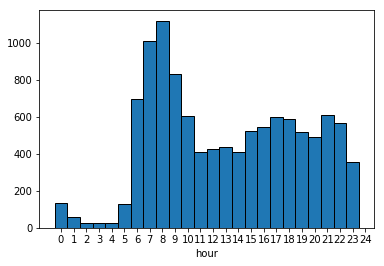

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.hist(hours, edgecolor = 'black', bins = np.arange(-.5,24.5,1))
plt.xlabel('hour')
plt.xticks(np.arange(0,25,1));

We can also plot the days of the week that he tweets:

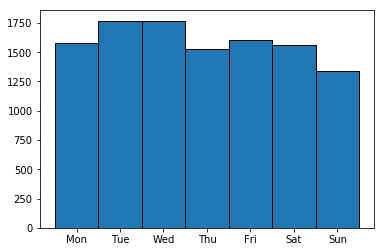

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

days = [date.weekday() for date in eastern_dates]

plt.hist(days, edgecolor="black", bins=np.arange(-.5,7.5,1))
plt.xticks(np.arange(0,7,1),['Mon','Tue','Wed','Thu','Fri','Sat','Sun']);

Next, we can plot the number of tweets per day over time:

<BarContainer object of 1174 artists>

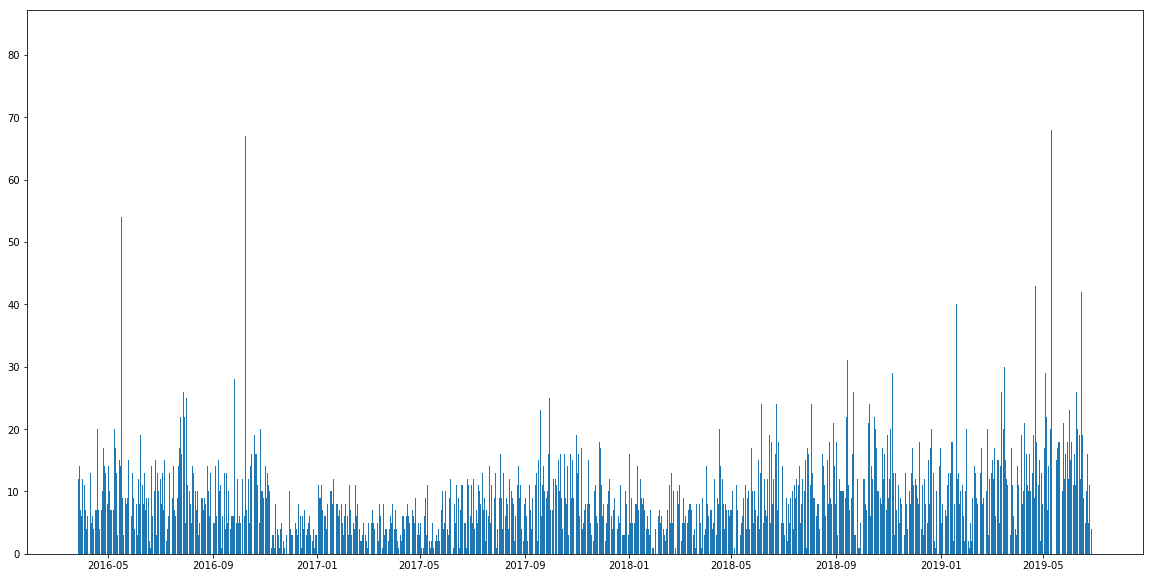

In [34]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

dates = [date.date() for date in eastern_dates]

count_days={}
for day in dates:
    if day not in count_days:
        count_days[day]=1
    else:
        count_days[day]+=1
        
plt.rcParams['figure.figsize'] = [20, 10]
plt.bar(list(count_days.keys()), count_days.values())

On which date did he tweet the most and how many tweets did he tweet?

In [53]:
from collections import Counter
freq = Counter(dates)
print(freq.most_common()[0:5])

[(datetime.date(2016, 10, 19), 83), (datetime.date(2019, 5, 1), 75), (datetime.date(2019, 5, 11), 68), (datetime.date(2016, 10, 9), 67), (datetime.date(2016, 10, 4), 56)]


What were the maximum amount of retweets for one of his tweets and what was the tweet?

In [38]:
print(max(retweets))
print(text[retweets.index(max(retweets))])

369110
#FraudNewsCNN #FNN https://t.co/WYUnHjjUjg


### Chatbot

Now let's make a Donald Trump chatbot that uses his previous tweets to create new tweets. Let's make one long string that contains all of his tweets in lowercase format:

In [39]:
all_tweets = ''
for tweet in text:
    all_tweets = all_tweets + tweet
    
all_tweets = all_tweets.lower()

print(all_tweets[0:500])

.....united states supreme court is given additional information from which it can make a final and decisive decisi… https://t.co/lr9zvghgl9seems totally ridiculous that our government, and indeed country, cannot ask a basic question of citizenship in a v… https://t.co/wxmigvzujithank you! #g20summit https://t.co/28y5rpe3bethank you @msnbc, real professionals! @chucktodd @maddow https://t.co/7zckcuq4yai look forward to speaking with prime minister modi about the fact that india, for years having


17.Next, we'll remove certain punctuation (and hashtags and hyperlinks) and put spaces between other punctuation. We can do that most easily using regular expressions. The regular expression package is very powerful - there are loads of online tutorials for using regular expressions to manipulate strings.

In [16]:
import re


all_tweets = re.sub(r"http\S+", "", all_tweets) #remove hyperlinks
all_tweets = re.sub(r"amp\S+", "", all_tweets) #remove ampersand symbol
all_tweets = re.sub(r"\t", "", all_tweets)  # remove tabs
all_tweets = re.sub(r"\v", "", all_tweets)  # remove vertical space
all_tweets = re.sub(r"\r", "", all_tweets)  # remove carriage return
all_tweets = re.sub(r"\n", "", all_tweets)  # remove new lines
all_tweets = re.sub(r"\(", "", all_tweets)  # remove parenthesis
all_tweets = re.sub(r"\)", "", all_tweets)  # remove parenthesis
all_tweets = re.sub(r"\.\.\.", "", all_tweets)  # remove ...
all_tweets = re.sub(r"\. \. \. ", "", all_tweets)  # remove . . .
all_tweets = re.sub(r"\"", "", all_tweets)  # remove quotations
all_tweets = re.sub(r"!", "! ", all_tweets)  # insert space after !
all_tweets = re.sub(r"\.", ". ", all_tweets)  # insert space after .
all_tweets = re.sub(r"\?", "? ", all_tweets)  # insert space after ?

18.Split the string all_tweets into a list of words called words. Remove words that contain just punctuation in the following list:

In [17]:
words = all_tweets.split()
bad_words = ['…', '.', '!', '?', ',']
words = [x for x in words if x not in bad_words]

19.We'll make the chatbot using Markov chains. A Markov chain is a randomly determined model describing a sequence of possible events in which the probability of each event depends only on the state attained in the previous event. What does this mean?

We'll make a key-value dictionary where each key is a two word phrase and each value is a list containing all the possible single words that come after that phrase. Here's a concrete example. Read it carefully, paying special attention to the "and i" phrase.


"hi my name is Al and i live in a box that i like very much and i can live in there as long as i want"

"hi my" -> ["name"]

"my name" -> ["is"]

"name is" -> ["Al"]

"is Al" -> ["and"]

"Al and" -> ["i"]

"and i" -> ["live"]

........

"and i" -> ["live", "can"]

........

"i can" -> ["live"]

......

Here's the word_dict containing these key-value pairs:

In [18]:
word_dict=dict()
num_of_words = 2  # create phrases of length 2

for i in range(len(words)-num_of_words):
    phrase = ' '.join([words[j] for j in range(i, i+num_of_words)])
    if phrase not in word_dict:
        word_dict[phrase]=[words[i+num_of_words]]
    else:
        word_dict[phrase] = word_dict[phrase]+[words[i+num_of_words]]
        
print(word_dict['the fake'])

['news', 'news', 'news', 'news,', 'news', 'news', 'news', 'news', 'news', 'media', 'media', 'media', 'news', 'media.', 'media', 'news', 'news', 'media', 'media', 'trump/russia', 'news', 'news', 'news', '&', 'news', 'news,', 'news', 'news', 'news', 'msm', 'news.', 'news', 'news', 'news!', 'news', 'news', 'media,', '&', 'news', 'washington', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'newsif', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'dossier', 'news', 'story', 'news', 'news', 'dossier', 'news', 'news', 'news', 'news', 'news', 'dossier.', 'news', 'news', 'news', 'news', 'news', 'news', 'news', 'news,', 'news!', 'ne

Here are the randomly generated tweets:

In [22]:
import random
#pick a random key value to start with
starting_phrase = random.choice(list(word_dict.keys()))
next_word = random.choice(word_dict[starting_phrase])
new_tweet = ' '.join([starting_phrase, next_word])

starting_phrase = starting_phrase.split()[1] + ' ' + next_word

while len(new_tweet) <= 140: #get approximately 140 characters
    try:
        next_word = random.choice(word_dict[starting_phrase])
        new_tweet = ' '.join([new_tweet, next_word])
        starting_phrase = starting_phrase.split()[1] + ' ' + next_word
    except:
        if new_tweet[-1] not in string.punctuation: #if we run out of pairs but it isn't the end of a line, make it the end of a sentence.
            new_tweet = ''.join([new_tweet, '.'])
            starting_phrase = random.choice(list(word_dict.keys())) #generate a new phrase to start a new sentence
            new_tweet = ' '.join([new_tweet, starting_phrase.capitalize()])
print(new_tweet.capitalize())

Since roe v. wade, america has been creating tremendous benefits for our country. ver… disgraceful that the people became the rulers of this webrepublicans


Compare this newly generated tweet to the text from where it came.

Chatbot:

Since roe v. wade, america has been creating tremendous benefits for our country. ver… disgraceful that the people became the rulers of this webrepublicans

Actual tweet:

https://twitter.com/realdonaldtrump/status/999087688983764992?lang=en

## Using Selenium for automation

To use Selenium, you will need to download Selenium and chromedriver. See inside the Movies directory - Movie Problem Set Answer Key for more info on how to do this.


### Example: Movie Analysis


Let's read in some movie data on the top 100 grossing movies of 2017.

In [54]:
movies = pd.read_pickle('Movies/movies.pkl')
movies.head()

,movie,total gross,open gross,open date,ratio,open month,director
0,Star Wars: The Last Jedi,620181382,220009584,2017-12-15,0.354750,12,Rian Johnson
1,Beauty and the Beast (2017),504014165,174750616,2017-03-17,0.346718,3,Bill Condon
2,Wonder Woman,412563408,103251471,2017-06-02,0.250268,6,Patty Jenkins
3,Jumanji: Welcome to the Jungle,404515480,36169328,2017-12-20,0.089414,12,Jake Kasdan
4,Guardians of the Galaxy Vol. 2,389813101,146510104,2017-05-05,0.375847,5,James Gunn


What are the urls for each of these movies?

In [55]:
movie_urls = []
with open('Movies/movieurls.txt', 'r') as f:
    for line in f:
        movie_urls.append(line.strip())
print(movie_urls[0:10])

['http://www.boxofficemojo.com/movies/?id=jurassicworldsequel.htm', 'http://www.boxofficemojo.com/movies/?id=starwars8.htm', 'http://www.boxofficemojo.com/movies/?id=beautyandthebeast2017.htm', 'http://www.boxofficemojo.com/movies/?id=wonderwoman.htm', 'http://www.boxofficemojo.com/movies/?id=jumanji2016.htm', 'http://www.boxofficemojo.com/movies/?id=marvel17a.htm', 'http://www.boxofficemojo.com/movies/?id=spiderman2017.htm', 'http://www.boxofficemojo.com/movies/?id=it.htm', 'http://www.boxofficemojo.com/movies/?id=marvel2017.htm', 'http://www.boxofficemojo.com/movies/?id=despicableme3.htm']


Let's go to each movie url and save the director's name. We'll need Selenium to go to each website for us, find the director, and save it. Let's import the necessary packages first.

In [43]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome('/Users/shareshianl/Desktop/chromedriver')

for i in range(5):
    url = movie_urls[i]
    driver.get(url)
    href = driver.find_element_by_xpath( '//a[contains(@href, "/people/chart/?view=Director")]')
    director = href.text
    print(director, url)
    
driver.close()

J.A. Bayona http://www.boxofficemojo.com/movies/?id=jurassicworldsequel.htm
Rian Johnson http://www.boxofficemojo.com/movies/?id=starwars8.htm
Bill Condon http://www.boxofficemojo.com/movies/?id=beautyandthebeast2017.htm
Patty Jenkins http://www.boxofficemojo.com/movies/?id=wonderwoman.htm
Jake Kasdan http://www.boxofficemojo.com/movies/?id=jumanji2016.htm


Using this technique, we could find that only Ridley Scott has more than one of the top 100 grossing movies in 2017:

In [7]:
movies[movies['director']=='Ridley Scott']

,movie,total gross,open gross,open date,ratio,open month,director
41,Alien: Covenant,74262031,36160621,2017-05-19,0.486933,5,Ridley Scott
91,All the Money in the World,25113707,5584684,2017-12-25,0.222376,12,Ridley Scott
